In [44]:
# install packages
# %pip install pandas numpy seaborn matplotlib scikit-learn

# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# sanitize data
def sanitize_data(df):
    """
    Sanitize the dataset by dropping specific columns and grouping the data by latitude and longitude, then calculating the mean for each group.
    @param df - the dataset to be sanitized
    @return The sanitized dataset
    """
    # drop columns ends with _depth
    df = df.drop(columns=[col for col in df.columns if col.endswith('_depth_cluster')])

    return df

# check the missing values
def check_missing_values(df):
    """
    Check a DataFrame for missing values and return the count of missing values in each column.
    @param df - The DataFrame to check for missing values
    @return A Series containing the count of missing values in each column
    """
    return df.isnull().sum()

# plot the missing values
def plot_missing_values(datasets, title=[]):
    """
    Plot the missing values in the datasets and display the number of missing values per column using a heatmap.
    @param datasets - list of datasets to analyze
    @param title - list of titles for each dataset
    @return None
    """
    fig, axes = plt.subplots(1, len(datasets), figsize=(12, 4))
    for i, (dataset, ax) in enumerate(zip(datasets, axes)):
        missing_values = check_missing_values(dataset).to_frame()
        sns.heatmap(missing_values, annot=True, fmt='g', ax=ax, cmap='Blues')
        ax.set_title(f'Missing Values per Column in {title[i]} dataset')
        ax.set_xlabel('Columns')
        ax.set_ylabel('Number of Missing Values')

    plt.suptitle('Missing Values per Column in ORGC and TCEQ datasets')
    plt.tight_layout()
    plt.show()

# Load the datasets

In [47]:
# datasets
country_name = "mexico"
master_dataset = pd.read_csv(f"../data/curation/{country_name}_wosis_merged.csv")
modelPath = f"../models/{country_name}_wosis"

# split dataset into orgc and tceq
orgc_df = master_dataset.drop(columns=['tceq']).copy()
tceq_df = master_dataset.drop(columns=['orgc']).copy()

# Sanitize the datasets
- Remove depth cluster columns
- Replace missing values with forward fill

In [48]:
orgc_df.head()

,date,longitude,latitude,upper_depth,lower_depth,country_name,region,continent,bdfi33,bdfiod,...,phkc,phnf,phprtn,sand,silt,totc,wg0010,wg0033,wg0200,wg1500
0,1964-??-??,-90.7319,18.6152,0.0,2.0,Mexico,Central America,Northern America,NaN,NaN,...,NaN,NaN,NaN,24.0,11.0,NaN,NaN,NaN,NaN,NaN
1,1964-??-??,-90.7319,18.6152,0.0,3.0,Mexico,Central America,Northern America,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1964-??-??,-90.7319,18.6152,0.0,4.0,Mexico,Central America,Northern America,NaN,NaN,...,NaN,NaN,NaN,30.0,21.0,NaN,NaN,NaN,NaN,NaN
3,1964-??-??,-90.7319,18.6152,0.0,4.0,Mexico,Central America,Northern America,NaN,NaN,...,NaN,NaN,NaN,30.0,21.0,NaN,NaN,NaN,NaN,NaN
4,1964-??-??,-90.7319,18.6152,0.0,4.0,Mexico,Central America,Northern America,NaN,NaN,...,NaN,NaN,NaN,30.0,10.0,NaN,NaN,NaN,NaN,NaN


In [49]:
# sanitize data
# Remove columns that end with _depth_cluster
# orgc_df = sanitize_data(orgc_df)
# tceq_df = sanitize_data(tceq_df)

# Remove latitude, longitude, geometry and name columns
cols_to_drop = ['date', 'latitude', 'longitude', 'country_name', 'region', 'continent']
orgc_df = orgc_df.drop(columns=cols_to_drop).copy()
tceq_df = tceq_df.drop(columns=cols_to_drop).copy()

## Plot the missing values

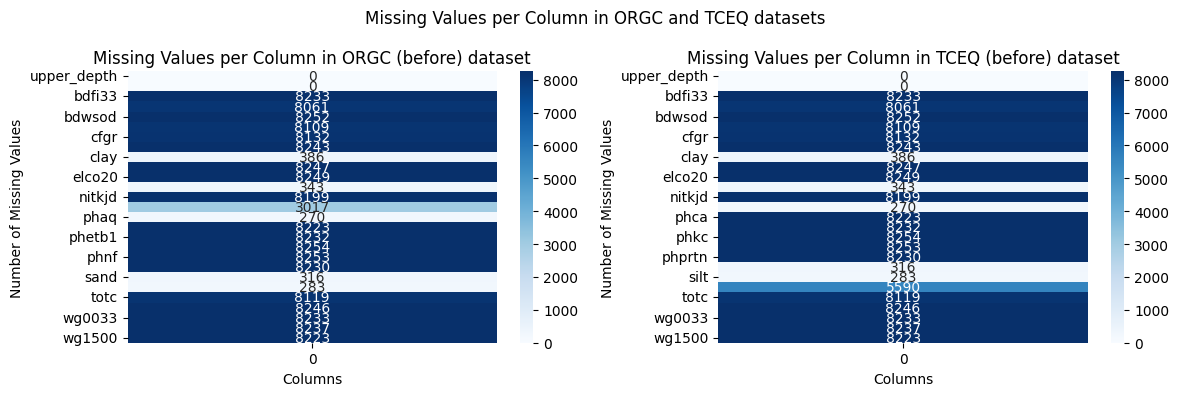

In [50]:
# plot the missing values after sanitization
plot_missing_values([orgc_df, tceq_df], ['ORGC (before)', 'TCEQ (before)'])

## Replace the missing values with the forward fill

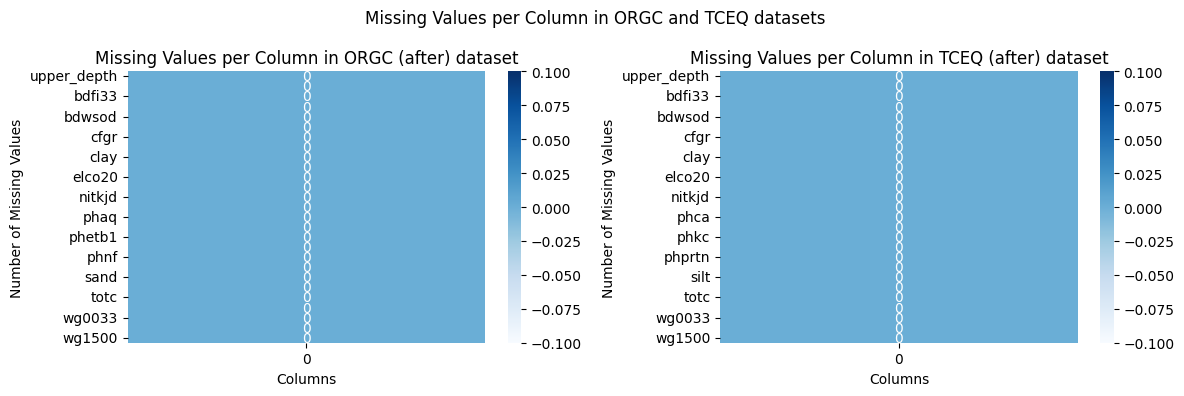

In [51]:
# replace the missing values with the mean of the column
orgc_df = orgc_df.fillna(orgc_df.mean())
tceq_df = tceq_df.fillna(tceq_df.mean())

# plot the missing values after sanitization
plot_missing_values([orgc_df, tceq_df], ['ORGC (after)', 'TCEQ (after)'])

## Check the head of the datasets

In [52]:
orgc_df.head()

,upper_depth,lower_depth,bdfi33,bdfiod,bdwsod,cecph7,cfgr,cfvo,clay,ecec,...,phkc,phnf,phprtn,sand,silt,totc,wg0010,wg0033,wg0200,wg1500
0,0.0,2.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,5.657143,9.075,42.645161,24.000000,11.000000,60.072535,31.12,32.935714,25.695833,19.161842
1,0.0,3.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,5.657143,9.075,42.645161,51.426469,23.639809,60.072535,31.12,32.935714,25.695833,19.161842
2,0.0,4.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,5.657143,9.075,42.645161,30.000000,21.000000,60.072535,31.12,32.935714,25.695833,19.161842
3,0.0,4.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,5.657143,9.075,42.645161,30.000000,21.000000,60.072535,31.12,32.935714,25.695833,19.161842
4,0.0,4.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,5.657143,9.075,42.645161,30.000000,10.000000,60.072535,31.12,32.935714,25.695833,19.161842


In [53]:
tceq_df.head()

,upper_depth,lower_depth,bdfi33,bdfiod,bdwsod,cecph7,cfgr,cfvo,clay,ecec,...,phnf,phprtn,sand,silt,tceq,totc,wg0010,wg0033,wg0200,wg1500
0,0.0,2.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,9.075,42.645161,24.000000,11.000000,57.650693,60.072535,31.12,32.935714,25.695833,19.161842
1,0.0,3.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,9.075,42.645161,51.426469,23.639809,57.650693,60.072535,31.12,32.935714,25.695833,19.161842
2,0.0,4.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,9.075,42.645161,30.000000,21.000000,57.650693,60.072535,31.12,32.935714,25.695833,19.161842
3,0.0,4.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,9.075,42.645161,30.000000,21.000000,57.650693,60.072535,31.12,32.935714,25.695833,19.161842
4,0.0,4.0,1.219524,0.6641,1.488889,33.698026,6.325581,15.111111,24.560419,11.335714,...,9.075,42.645161,30.000000,10.000000,57.650693,60.072535,31.12,32.935714,25.695833,19.161842


# Outliers

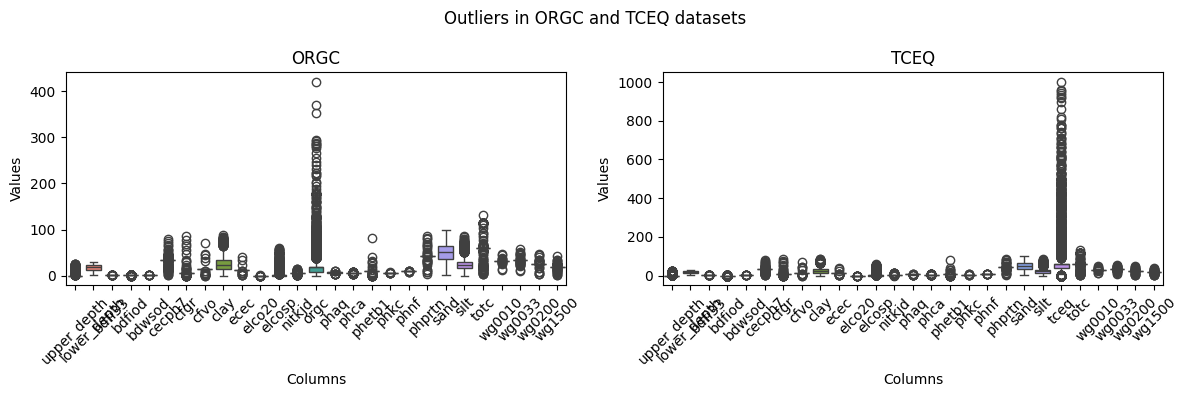

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=orgc_df, ax=ax1)
ax1.set_title('ORGC')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Values')
ax1.set_xticks(ticks=range(len(orgc_df.columns)), labels=orgc_df.columns, rotation=45)

sns.boxplot(data=tceq_df, ax=ax2)
ax2.set_title('TCEQ')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Values')
ax2.set_xticks(ticks=range(len(tceq_df.columns)), labels=tceq_df.columns, rotation=45)

plt.suptitle('Outliers in ORGC and TCEQ datasets')
plt.tight_layout()
plt.show()

# Normalize the data


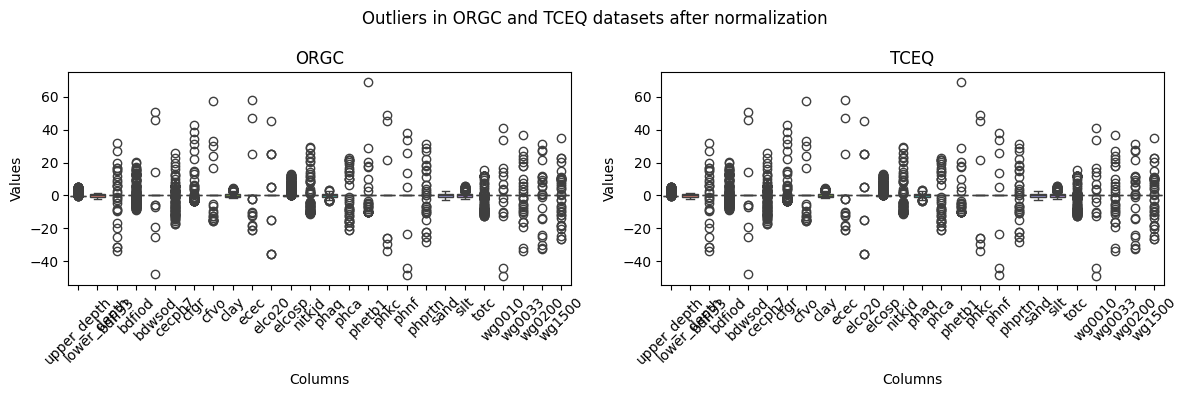

In [55]:
from sklearn.preprocessing import StandardScaler

# normalize the data using standard scaler
scaler = StandardScaler()
orgc_scaled = scaler.fit_transform(orgc_df.drop('orgc', axis=1))
tceq_scaled = scaler.fit_transform(tceq_df.drop('tceq', axis=1))

orgc_scaled = pd.DataFrame(orgc_scaled, columns=orgc_df.drop('orgc', axis=1).columns)
tceq_scaled = pd.DataFrame(tceq_scaled, columns=tceq_df.drop('tceq', axis=1).columns)

# plot the outliers after normalization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=orgc_scaled, ax=ax1)
ax1.set_title('ORGC')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Values')
ax1.set_xticks(ticks=range(len(orgc_scaled.columns)), labels=orgc_scaled.columns, rotation=45)

sns.boxplot(data=tceq_scaled, ax=ax2)
ax2.set_title('TCEQ')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Values')
ax2.set_xticks(ticks=range(len(tceq_scaled.columns)), labels=tceq_scaled.columns, rotation=45)

plt.suptitle('Outliers in ORGC and TCEQ datasets after normalization')
plt.tight_layout()
plt.show()

# Correlation Matrix


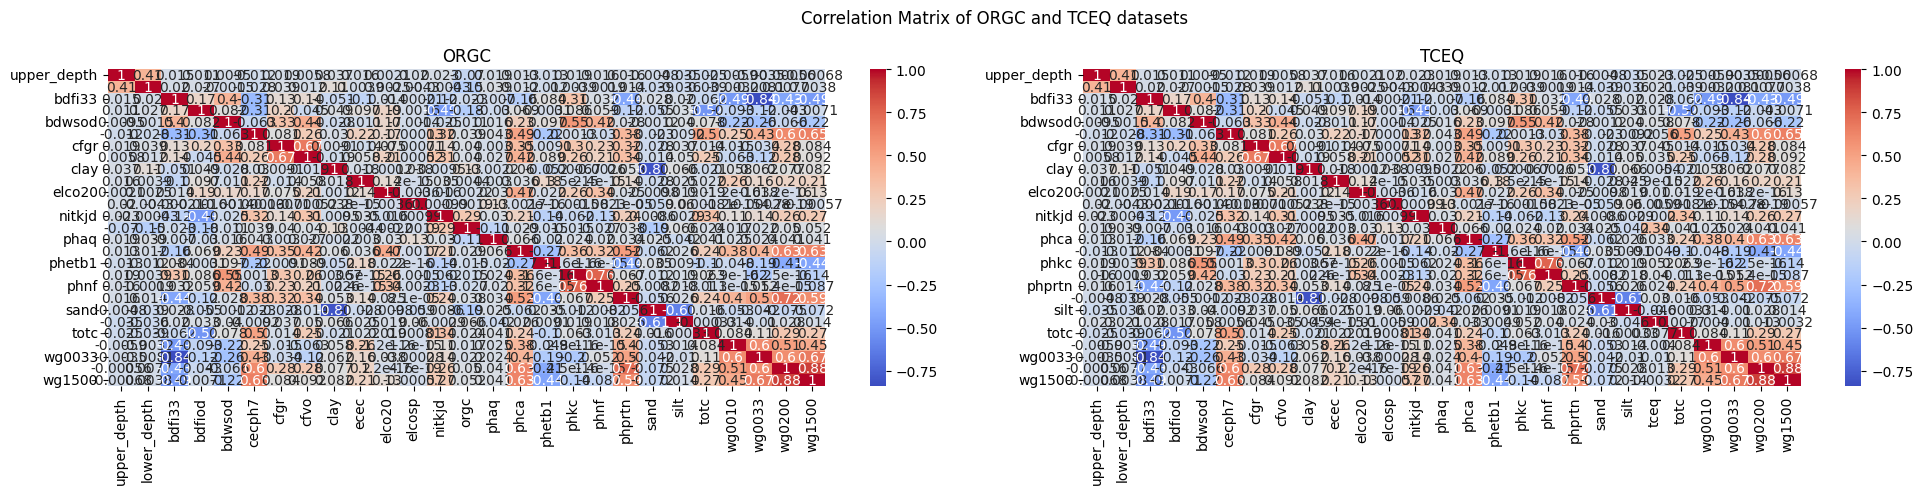

In [56]:
# correlation matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
corr_matrix = orgc_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('ORGC')

corr_matrix = tceq_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('TCEQ')

plt.suptitle('Correlation Matrix of ORGC and TCEQ datasets')
plt.tight_layout()
plt.show()


# Model Training and Evaluation

In [57]:
# import the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

def train_model(X, y, model):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # train the model
    model.fit(X_train, y_train)
    
    # evaluate the model
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2, y_test, y_pred

def validate_model(models, features, target, title):
    # train the models
    fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
    for i, (model_name, model) in enumerate(models.items()):
        mse, mae, r2, y_test, y_pred = train_model(features, target, model)

        print(f'{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}')
        print('--------------------------------')

        joblib.dump(model, f'{modelPath}{title}_{model_name}.pkl')  # Save the model to a file

        # Scatter plot of predicted vs actual
        axes[i].scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        axes[i].set_title(f'{model_name}\n(MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f})', fontsize=10)
        axes[i].set_xlabel('Actual')
        axes[i].set_ylabel('Predicted')
        
    plt.suptitle(f'Scatter plots of {title} models')
    plt.tight_layout()
    plt.figtext(0.5, 0.005,
                'The scatter plots show the predicted vs actual values for each model. '
                'The red dashed line represents the perfect prediction.', 
                ha='center', fontsize=10)
    plt.show()

# model list
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

## Organic Carbon Model

Random Forest Regressor - MSE: 268.55323949016326, MAE: 8.433012867864493, R2: 0.41297301448928203
--------------------------------
Gradient Boosting Regressor - MSE: 232.51256426309513, MAE: 8.072543736274755, R2: 0.4917538512964714
--------------------------------
Linear Regression - MSE: 838.2073158159614, MAE: 11.253466338395004, R2: -0.8322263204518048
--------------------------------
Support Vector Regressor - MSE: 416.06715428145804, MAE: 9.340055858849983, R2: 0.09052429301708942
--------------------------------
K-Nearest Neighbors Regressor - MSE: 309.20821953130377, MAE: 10.12884638745785, R2: 0.32410582962546564
--------------------------------


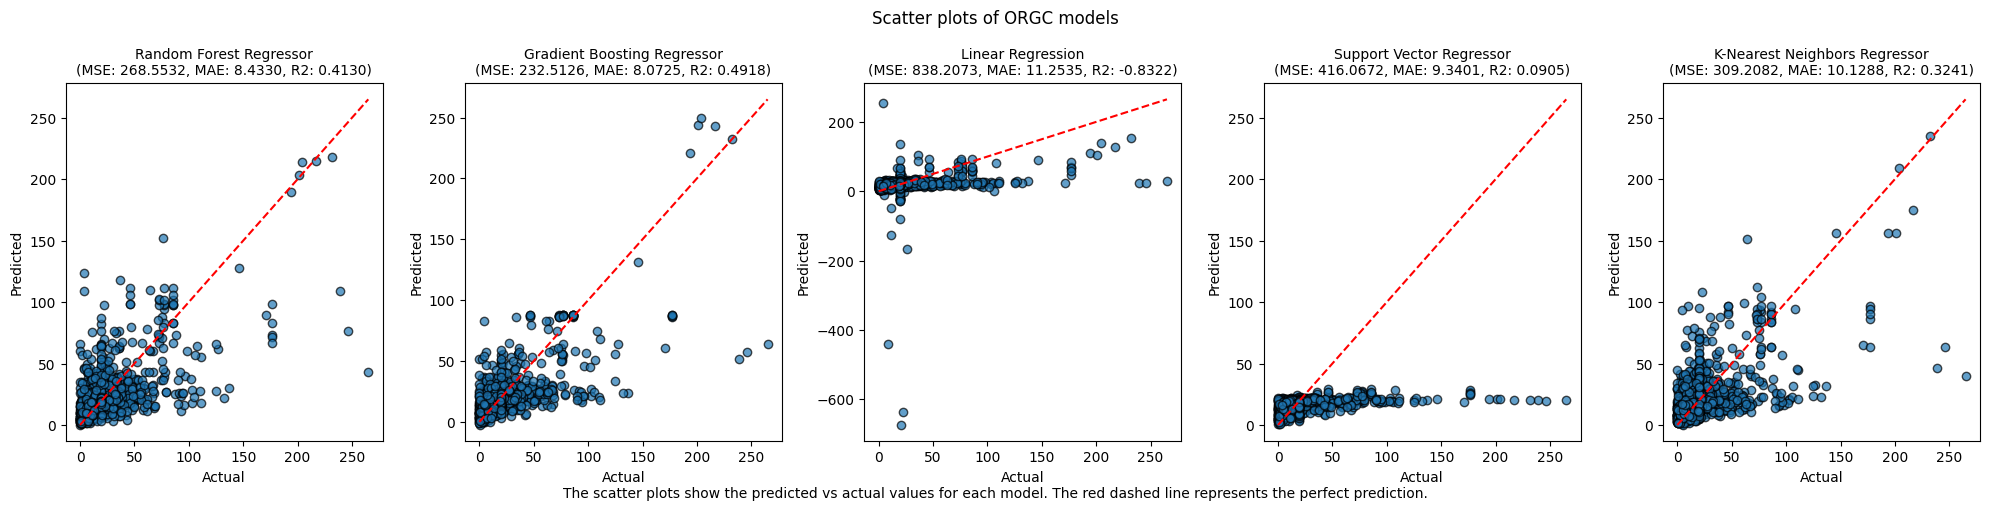

In [58]:
# train the models
validate_model(models, orgc_scaled, orgc_df['orgc'], 'ORGC')

## TCEQ Model


Random Forest Regressor - MSE: 5071.6248126640985, MAE: 26.895271013062867, R2: 0.08632464179524868
--------------------------------
Gradient Boosting Regressor - MSE: 4444.873071434874, MAE: 26.672785654278524, R2: 0.1992367050541738
--------------------------------
Linear Regression - MSE: 5055.808422500943, MAE: 33.97773954322734, R2: 0.08917403355461972
--------------------------------
Support Vector Regressor - MSE: 5285.080760961443, MAE: 25.45116192868333, R2: 0.04786962052977317
--------------------------------
K-Nearest Neighbors Regressor - MSE: 6096.007227209679, MAE: 34.35510046275649, R2: -0.09822232374752171
--------------------------------


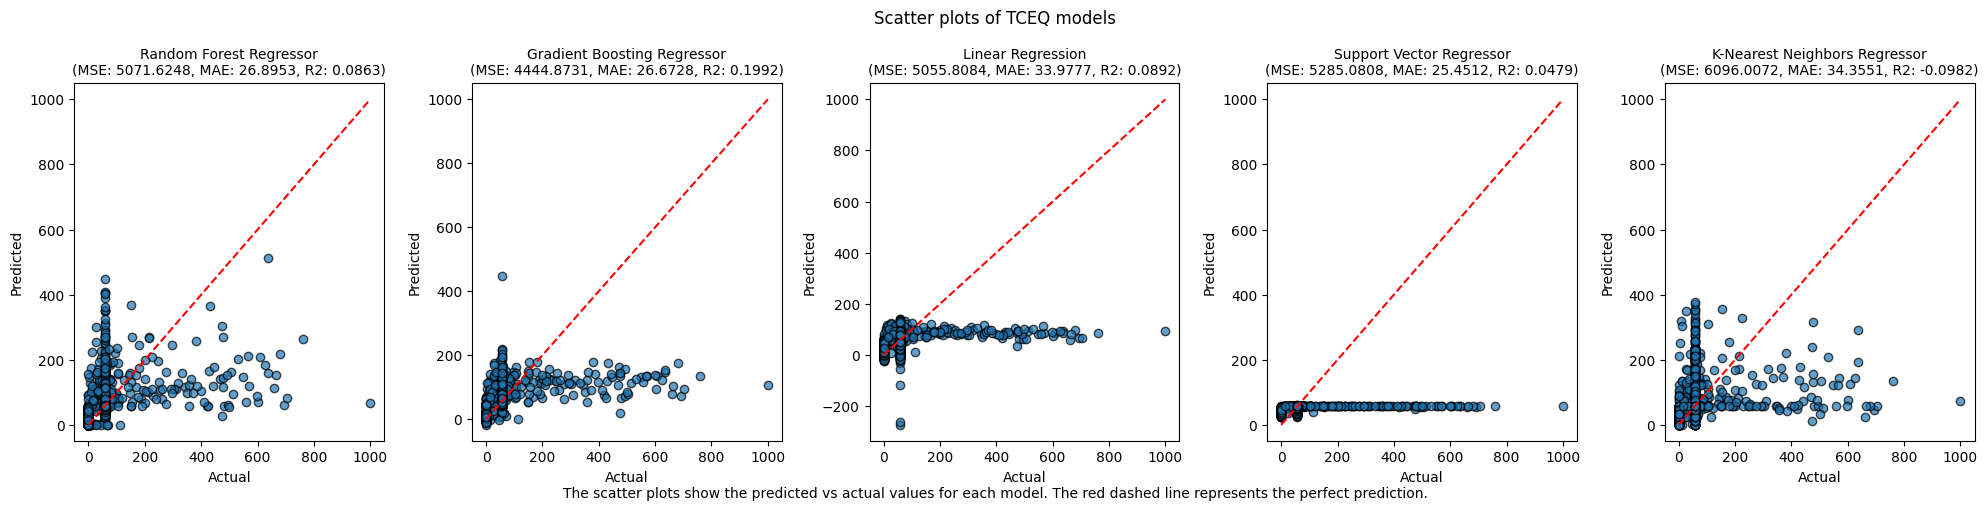

In [59]:
# train the models
validate_model(models, tceq_scaled, tceq_df['tceq'], 'TCEQ')

## Feature Selection

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(orgc_scaled, orgc_df['orgc'])
orgc_feature_score = selector.scores_

orgc_feature_columns = orgc_scaled.columns[selector.get_support()]
print("Top 5 Features based on SelectKBest: ", orgc_feature_columns)

Top 5 Features based on SelectKBest:  Index(['bdwsod', 'nitkjd', 'phkc', 'wg0010', 'wg0200'], dtype='object')


d:\miniconda3\envs\tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [61]:
selector = SelectKBest(f_classif, k=5)
selector.fit(tceq_scaled, tceq_df['tceq'])
tceq_feature_score = selector.scores_

# Get the top 5 significant features
tceq_feature_columns = tceq_scaled.columns[selector.get_support()]
print("Top 5 Features based on SelectKBest: ", tceq_feature_columns)

Top 5 Features based on SelectKBest:  Index(['bdwsod', 'cfgr', 'cfvo', 'phaq', 'phkc'], dtype='object')


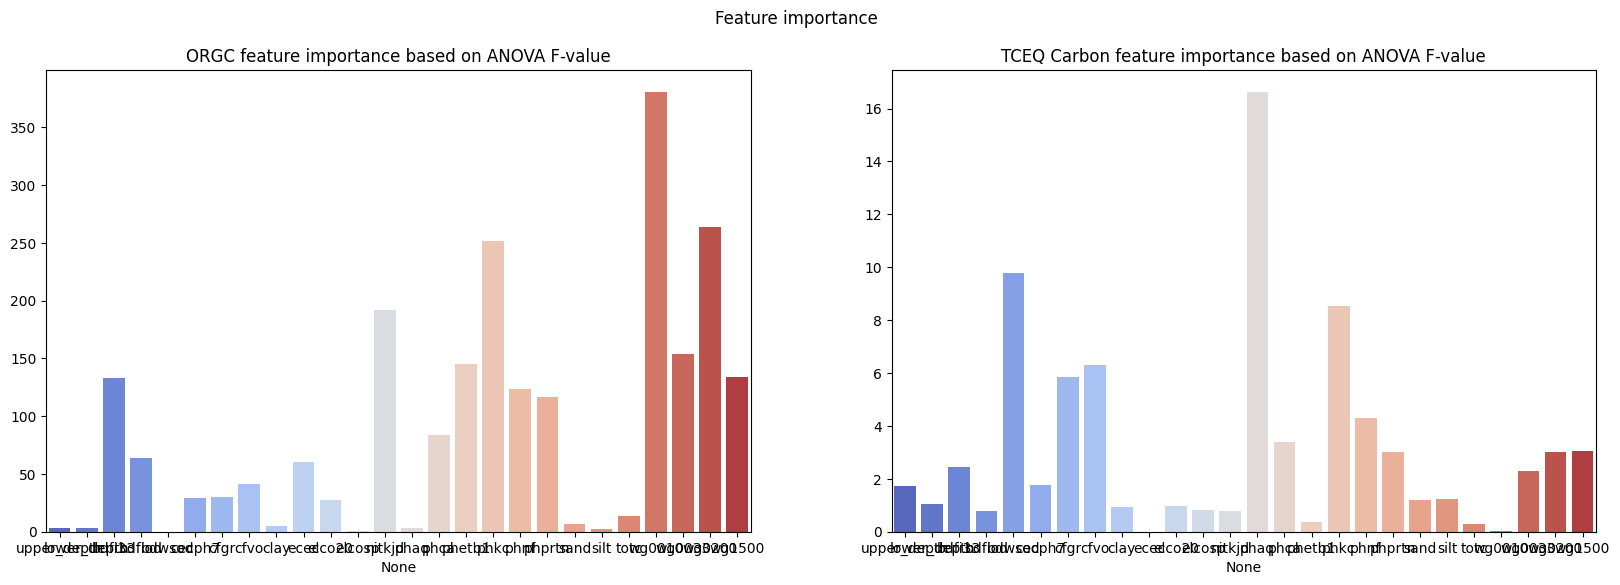

In [62]:
# Visualize feature importance scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=orgc_scaled.columns, y=orgc_feature_score, palette="coolwarm", ax=ax1, hue=orgc_scaled.columns)
ax1.set_title("ORGC feature importance based on ANOVA F-value")
sns.barplot(x=tceq_scaled.columns, y=tceq_feature_score, palette="coolwarm", ax=ax2, hue=tceq_scaled.columns)
ax2.set_title("TCEQ Carbon feature importance based on ANOVA F-value")

plt.suptitle("Feature importance")
plt.show()

## Train model on Selected features

Random Forest Regressor - MSE: 380.5950248031879, MAE: 9.92499591618342, R2: 0.16806235316786822
--------------------------------
Gradient Boosting Regressor - MSE: 381.2318147576211, MAE: 9.932820741452788, R2: 0.16667040240211284
--------------------------------
Linear Regression - MSE: 417.6529098951073, MAE: 10.288985872285297, R2: 0.08705801072831698
--------------------------------
Support Vector Regressor - MSE: 451.3096429034135, MAE: 10.248190055388084, R2: 0.013488201786471143
--------------------------------
K-Nearest Neighbors Regressor - MSE: 401.1086221396863, MAE: 10.67572830540845, R2: 0.12322195120777035
--------------------------------


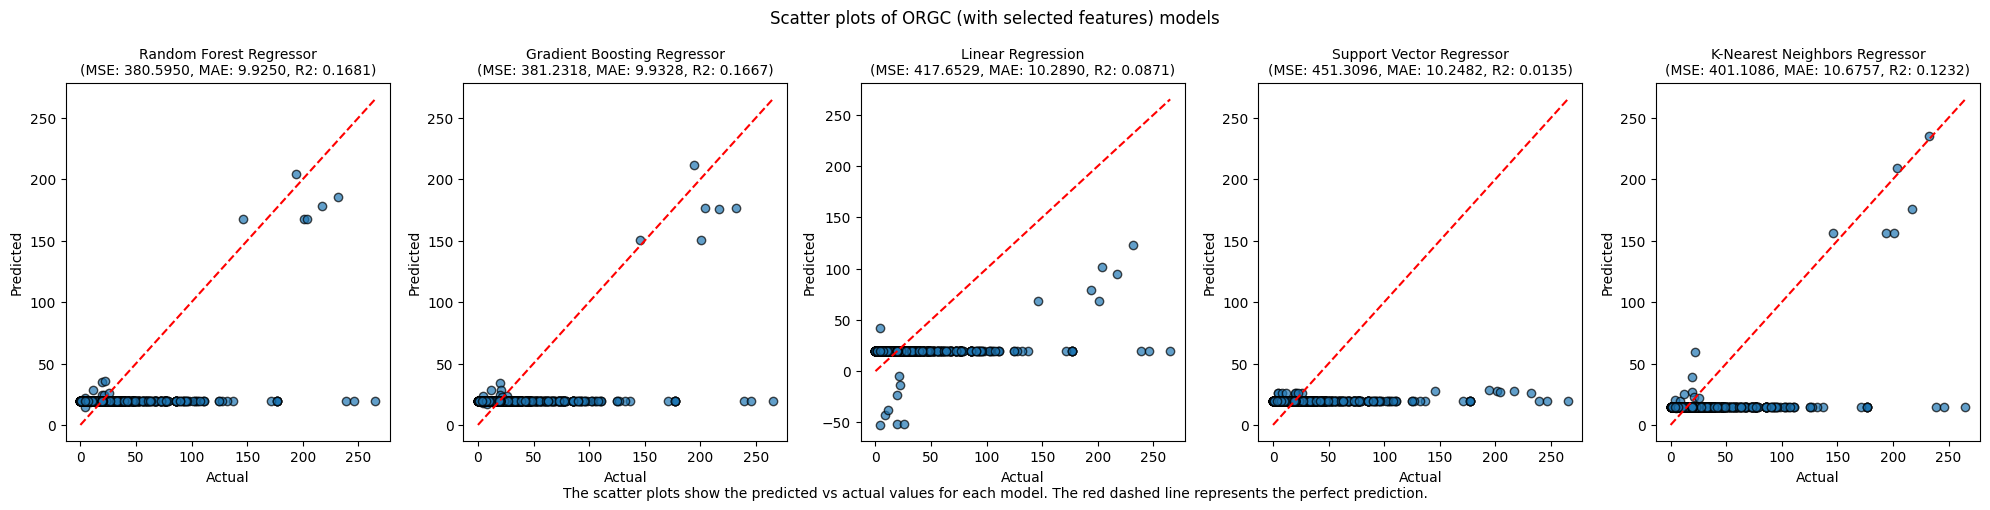

In [63]:
validate_model(models, orgc_scaled[orgc_feature_columns], orgc_df['orgc'], f'ORGC (with selected features)')

Random Forest Regressor - MSE: 4839.008051992766, MAE: 32.902233011624496, R2: 0.1282315670867441
--------------------------------
Gradient Boosting Regressor - MSE: 4821.347192857324, MAE: 32.84358310827781, R2: 0.1314132479864205
--------------------------------
Linear Regression - MSE: 4941.1440531493645, MAE: 33.140098880926146, R2: 0.10983132044205268
--------------------------------
Support Vector Regressor - MSE: 5153.7156628776065, MAE: 23.463241769588357, R2: 0.07153561663178032
--------------------------------
K-Nearest Neighbors Regressor - MSE: 6365.358086471254, MAE: 32.05196800258072, R2: -0.14674705732088378
--------------------------------


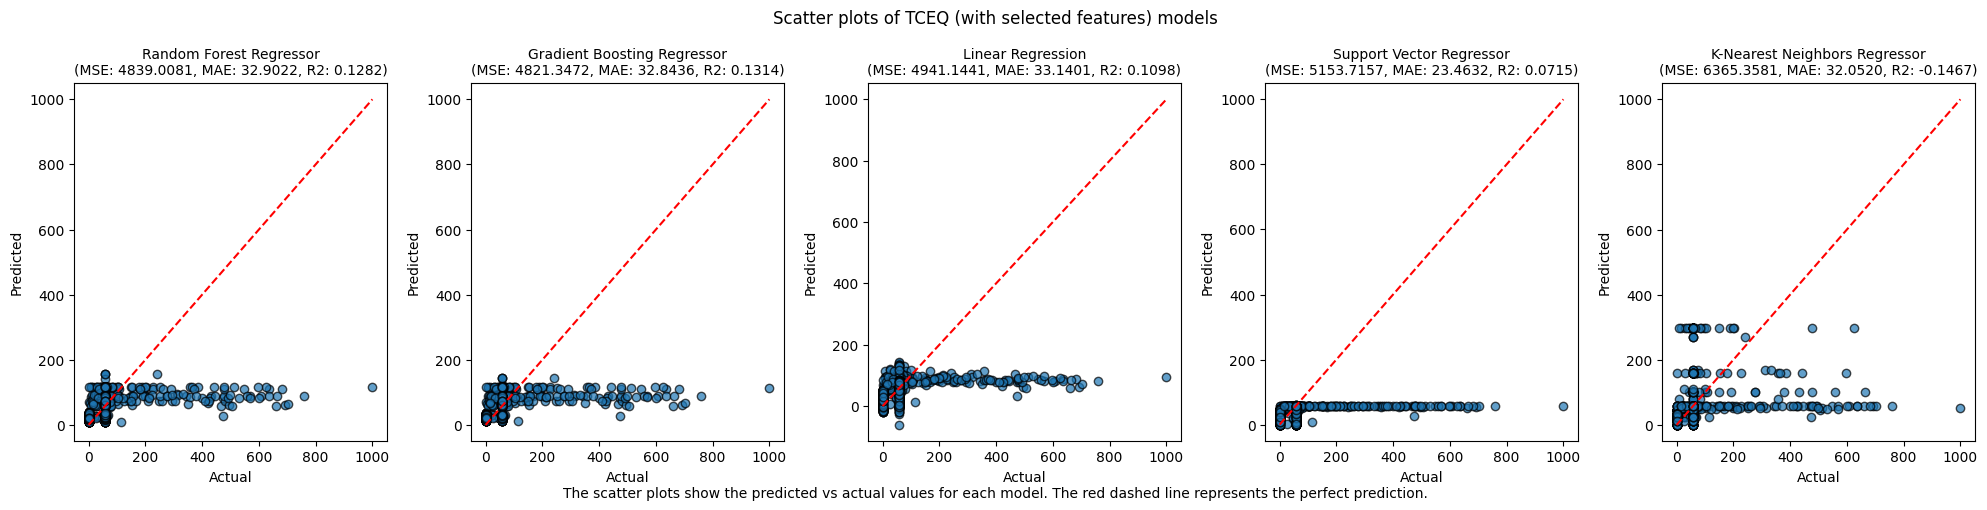

In [64]:
validate_model(models, tceq_scaled[tceq_feature_columns], tceq_df['tceq'], 'TCEQ (with selected features)')

## Parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

## Parameter tuning
models2 = {}

def split_and_scale(featurs, target):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(featurs, target, test_size=0.2, random_state=42)

    # scaling for models like SVR and KNN
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test

In [66]:
# for tceq only
X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test = split_and_scale(tceq_scaled, tceq_df['tceq'])

In [67]:
# for random forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
} 


rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
models2['Random Forest'] = best_rf

d:\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
217 fits failed with the following error:
Traceback (most recent call last):
  File "d:\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\miniconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\miniconda3\envs\tf\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\miniconda3\envs\tf\lib\site-packages\sklearn\uti

In [68]:
# for gradient boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
models2['Gradient Boosting'] = best_gb

In [69]:
# for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_
models2['KNN Regressor'] = best_knn

Random Forest - MSE: 4518.650844766139, MAE: 26.531835413233626, R2: 0.18594531699493322
--------------------------------
Gradient Boosting - MSE: 4476.164254152153, MAE: 26.98835416053194, R2: 0.19359946183648358
--------------------------------
KNN Regressor - MSE: 5426.679493506037, MAE: 32.756927516021165, R2: 0.022359990488535875
--------------------------------


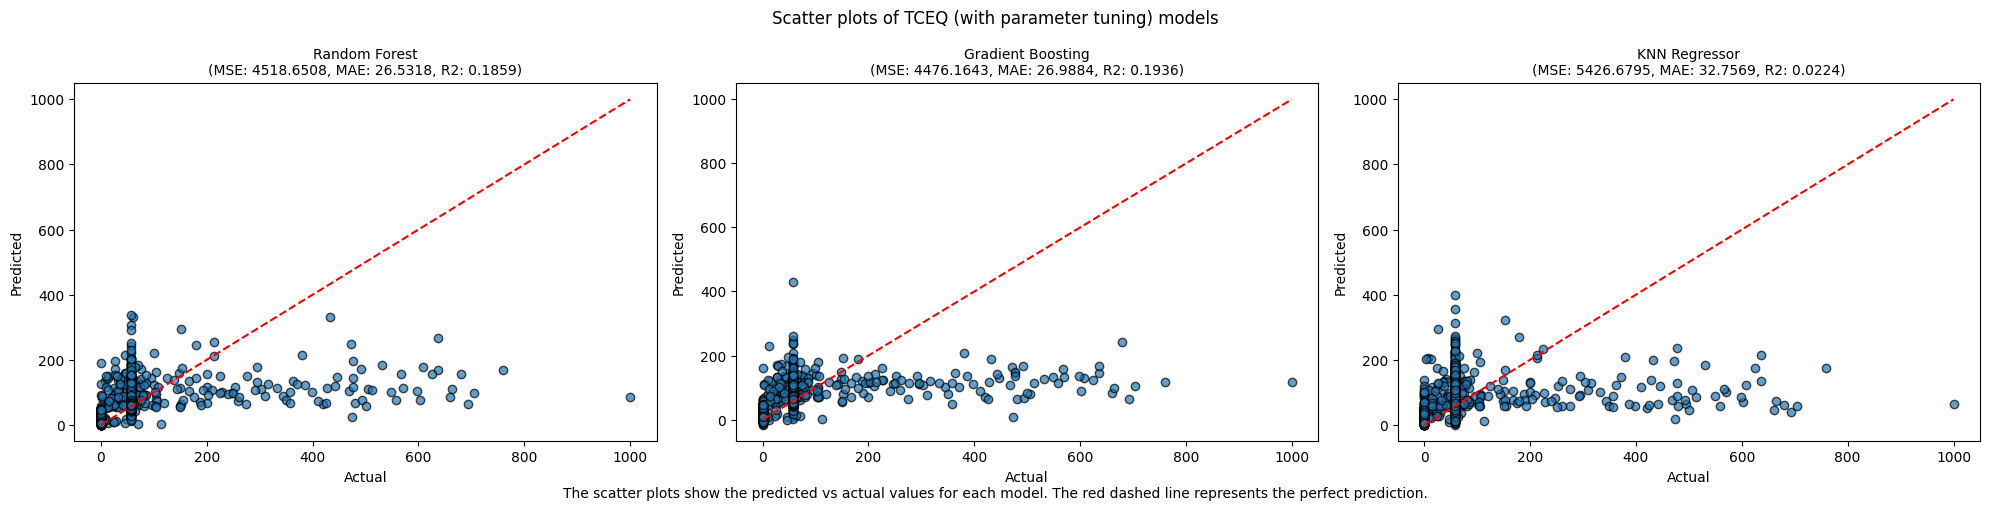

In [70]:
validate_model(models2, tceq_scaled, tceq_df['tceq'], 'TCEQ (with parameter tuning)')

# Deep Learning

In [71]:
# %pip install tensorflow

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
def build_model(params):
    model = Sequential([
        Dense(64, activation='relu', input_dim=params),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

## ORGC

Epoch 1/100
166/166 [==============================] - 1s 4ms/step - loss: 661.5583 - mae: 13.5014 - val_loss: 481.0176 - val_mae: 10.6640
Epoch 2/100
166/166 [==============================] - 1s 3ms/step - loss: 491.2271 - mae: 11.4305 - val_loss: 423.7893 - val_mae: 10.2284
Epoch 3/100
166/166 [==============================] - 1s 3ms/step - loss: 427.4315 - mae: 11.0509 - val_loss: 381.9866 - val_mae: 9.9796
Epoch 4/100
166/166 [==============================] - 1s 3ms/step - loss: 396.7132 - mae: 10.7177 - val_loss: 370.1970 - val_mae: 9.4116
Epoch 5/100
166/166 [==============================] - 1s 3ms/step - loss: 381.6752 - mae: 10.4660 - val_loss: 360.9510 - val_mae: 9.3326
Epoch 6/100
166/166 [==============================] - 1s 3ms/step - loss: 382.8689 - mae: 10.4241 - val_loss: 350.2792 - val_mae: 9.5391
Epoch 7/100
166/166 [==============================] - 1s 3ms/step - loss: 370.6789 - mae: 10.3213 - val_loss: 345.7594 - val_mae: 9.6082
Epoch 8/100
166/166 [===========

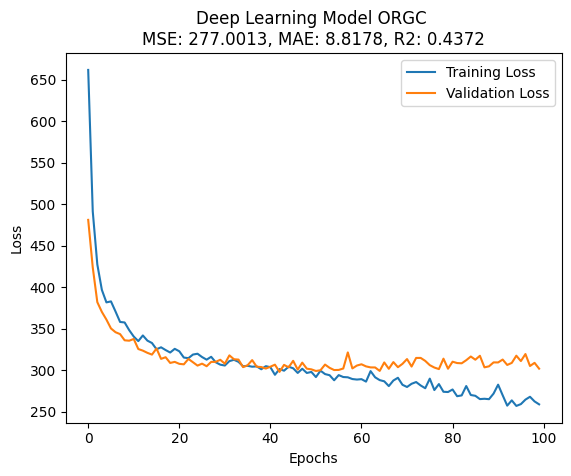

In [74]:
X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test = split_and_scale(orgc_scaled, orgc_df['orgc'])

# initialise and train
input_dim = X_train_scaled.shape[1]
model = build_model(input_dim)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate on test data
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Deep Learning Model - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f"Deep Learning Model ORGC \nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
plt.show()